# Timeseries classification from scratch
## Advanced ML Final Part 2
### By: Daniel Hill

#### Business Use Case:
This project is part of a MS in Business Analytics program. The intention of this assignment is to be applied to a business use case. For the business use case for Part 2 of my final, I will be setting up the following fake scenario:

Our business has many branches. One branch installed standing desks and the other did not. Over the past two years, we have seen a much higher rate of turnover at the branch without standing desks, and some of the employees who left said that they either want remote jobs or jobs where they have more flexiblity to be active and customize their workplace. Our business wants to collect data on people's movement throughout the day to understand if there are certain branches that are more or less active, and subsequently analyze turnover rates.

We decided to collect movement data for employees by strapping a smartphone on their waist and taking 561 measurements. We have categorized the data as WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, or LAYING, and would like to see if we can predict what the employee is doing based on their sensor data from the phone on their waist.

#### This Notebook:

I will be reimplementing the code here: [Keras Timeseries Classification Example](https://keras.io/examples/timeseries/timeseries_classification_from_scratch/).

I'm using a different dataset than the one from the example. The dataset I'm using can be obtained here: [Human Activity Recognition Dataset](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones).

Uncomment the following cell to install required packages:

In [1]:
# Uncomment to install the required packages:
# !pip install -r requirements.txt

In [2]:
# Uncomment to download the dataset
# !curl -O https://archive.ics.uci.edu/static/public/240/human+activity+recognition+using+smartphones.zip

In [3]:
# Uncomment to rename the zipped file
# !mv human+activity+recognition+using+smartphones.zip HumanActivity.zip

In [4]:
# Uncomment to unzip the dataset after you download
# !unzip -qq HumanActivity.zip

In [5]:
# Uncomment to unzip the second zipped file
# !unzip -qq UCI\ HAR\ Dataset.zip

In [6]:
# Imports
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Load the data:

In [7]:
# Load the training data from the text files we downloaded
# Subtract 1 from the training and testing labels, because we have 1, 2, 3, 4, 5, and 6.
# Keras will expect 0, 1, 2, 3, 4, and 5.
X_train = np.loadtxt("UCI HAR Dataset/train/X_train.txt")
y_train = np.loadtxt("UCI HAR Dataset/train/y_train.txt") - 1

# Load the testing data from the text files we downloaded
X_test = np.loadtxt("UCI HAR Dataset/test/X_test.txt")
y_test = np.loadtxt("UCI HAR Dataset/test/y_test.txt") - 1

## Visualize the data:

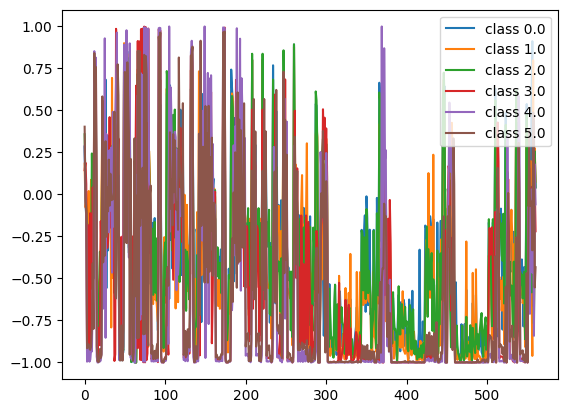

In [8]:
# Get all unique class names from the training and testing sets.
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

# Plot each class to see what they look like over time.
plt.figure()
for c in classes:
    c_x_train = X_train [y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [9]:
# Reshape the prediction data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [10]:
# Get the number of classes and store as a variable
num_classes = len(np.unique(y_train))

In [11]:
# Randomly scramble the training and testing predictors
idx = np.random.permutation(len(X_train))
X_train = X_train[idx]
y_train = y_train[idx]

## Fit and train the model:

In [12]:
# Define a function to construct our model based on input shape
def make_model(input_shape):
    # Initialize input layer
    input_layer = keras.layers.Input(input_shape)

    # Add convoultion layer with normalization and relu activation function
    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    # Add second layer with the same configuration as the first
    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    # Add third layer with the same configuration as the first and second
    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    # Average pooling done at the end
    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    # Feed this into an output layer with the number of classes
    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    # Return the constructed model
    return keras.models.Model(inputs=input_layer, outputs=output_layer)

# Create a model using this function and passing the shape of X_train
model = make_model(input_shape=X_train.shape[1:])

In [14]:
# Define number of epochs to train for
epochs = 70
# Define batch size
batch_size = 32

# Create callbacks
callbacks = [
    # Output the model to the current dir once it is completed
    keras.callbacks.ModelCheckpoint(
        "best_model.keras", save_best_only=True, monitor="val_loss"
    ),
    # When the loss function plateaus, reduce the learning rate
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    # When the model stops improving for lots of epochs, stop training
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
# Compile the model using categorical crossentropy
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

# Fit the model
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/70
184/184 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 1.2566 - sparse_categorical_accuracy: 0.4314 - val_loss: 7.4857 - val_sparse_categorical_accuracy: 0.1652 - learning_rate: 0.0010
Epoch 2/70
184/184 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.9907 - sparse_categorical_accuracy: 0.6046 - val_loss: 6.2826 - val_sparse_categorical_accuracy: 0.1652 - learning_rate: 0.0010
Epoch 3/70
184/184 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.8516 - sparse_categorical_accuracy: 0.6664 - val_loss: 1.5960 - val_sparse_categorical_accuracy: 0.3698 - learning_rate: 0.0010
Epoch 4/70
184/184 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.7625 - sparse_categorical_accuracy: 0.7072 - val_loss: 1.4345 - val_sparse_categorical_accuracy: 0.4507 - learning_rate: 0.0010
Epoch 5/70
184/184 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6750 - sparse_categorical_accuracy: 0.7399 - val_loss: 0.9460 - val_sparse_categorical_accuracy: 0.5194 - learning_rate: 0.0010
Epoch 6/70
184/184 ━━━━━━━━━━━━━━━━━━━━ 6s 35

## Show how the model did on test data:

In [15]:
model = keras.models.load_model("best_model.keras")

test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5041 - sparse_categorical_accuracy: 0.8100
Test accuracy 0.8211740851402283
Test loss 0.459016889333725


## See how accuracy improved or declined over many epochs:

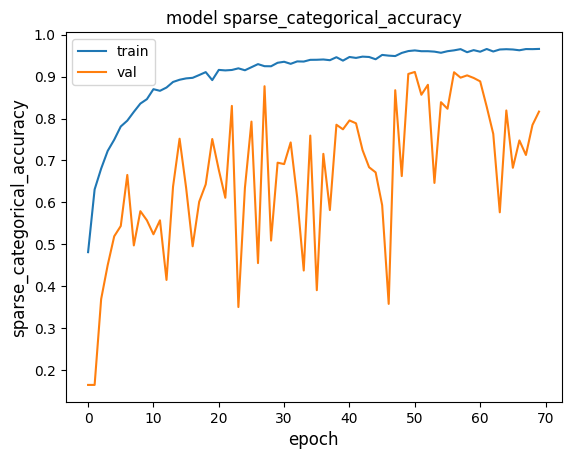

In [16]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

Training was a bit sporatic on the testing data, but definitely improved over time as we improved our training accuracy.

## Investigate how many instances are miscategorized by our model:

- 0 WALKING
- 1 WALKING_UPSTAIRS
- 2 WALKING_DOWNSTAIRS
- 3 SITTING
- 4 STANDING
- 5 LAYING

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


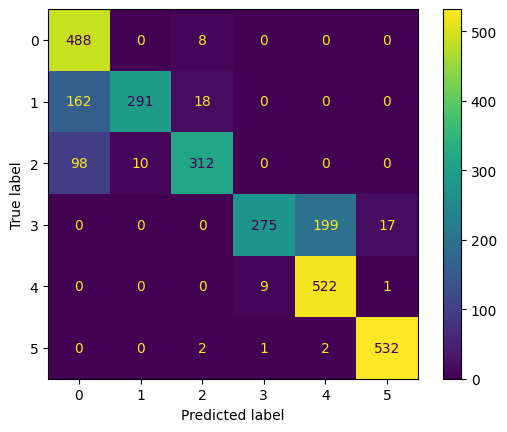

In [17]:
y_preds = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

The performance of the model was great when we looked at miscategorized instances. We can see the model gets confused between regular walking, and walking upstairs vs. downstairs. This makes sense. We also see a lot of confusion between sitting and standing. This may present a problem in our business use case, so if we want to deploy this we should try some different model architectures to see if we can distinguish between these two cases.